### Credit Scoring
***

### Pilares da Cadeia de Crédito:

* Prospecção
* Concessão

> Toda concessão de crédito está relacionada ao risco de inadimplência.

* Gestão de Risco
* Recuperação

### Bibliotecas

In [108]:
import pandas as pd
import numpy as np

# Formatação:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('max_columns', None)
pd.set_option('max_rows', 500)

### Dados

In [109]:
url = 'https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'
dados = pd.read_csv(url)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Verificação preliminar

In [110]:
# Verificando se a base tem dados duplicados:

dados.duplicated().sum()

0

In [111]:
# Verificando se há dados nulos:

dados.isnull().sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

***
### Credit Scoring
***

### Quando iniciou-se  a análise de credit scoring, os analistas de crédito se baseavam na técnica dos 5Cs:

1. The Character of the person — do you know the person or their family?
2. The Capital — how much is being asked for?
3. The Collateral — what is the applicant willing to put up from their own resources?
4. The Capacity — what is their repaying ability. How much free income do they have?
5. The Condition — what are the conditions in the market? 

Modelos tradicionais de credit score aplicam técnicas de classificação de período único (por exemplo, logit, probit) para
classificar os clientes de crédito em diferentes grupos de risco e estimar a probabilidade de inadimplência. Modelos clássicos de score, como o logístico e de regressão só podem fornecer uma estimativa da probabilidade de inadimplência para um empréstimo, mas não o cenário como um todo.

Atualmente, com a revolução do big data, as instituições bancárias se utilizam de técnicas de machine learning para lidar com reconhecimento de padrões em conjuntos de dados extremamente grandes. Estão sendo amplamente utilizados: Bagging (Leo Breiman, 1996), Boosting (Schapire, Freund, Bartlett, & Lee, 1998), e recentemente o Stacking (Wolpert, 1992). Estes são chamados de métodos Ensemble (Dumitrescu et al. 2018).

##### Mais em [Machine Learning Approach for credit score analysis](https://run.unl.pt/bitstream/10362/62427/4/TEGI0439.pdf)

***
### How the regular process works

Loan applications are usually assessed through a credit score model, which is most often based on a logistic regression (LR). It is trained on historical data, such as credit history. The model assesses the importance of every attribute provided and translates them into a prediction.

The main limitation of such a model is that it can take into account only linear dependencies between input variables and the predicted variable. On the other hand, it is this very property that makes logistic regression so interpretable.  LR is in widespread used in credit risk modelling.

<img src = 'assets/credit_scoring.jpeg'>

### What machine learning brings to the table

Machine learning enables the utilization of more advanced modeling techniques, such as decision trees and neural networks. This introduces non-linearities to the model and allows to detect more complex dependencies between the attributes.

### Combining the models

Using two scoring engines – logistic regression and the ML based one – to assess all of the loan applications

With a clear correlation between the two assessment approaches, a high score in one model would likely mean a high score in the other.

<img src = 'assets/Loan-applications-assessed-by-2-models.jpeg'>

#### [See more here](https://deepsense.ai/using-machine-learning-in-credit-risk-modelling-to-reduce-risk-costs/)

***
### Regressão Logística
***

### Transformação das variáveis categóricas em variáveis numéricas

### Variável `conta_corrente`

In [112]:
dados['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [113]:
dict_cc = {'< 0 DM':1,
           '0 <= ... < 200 DM':2,
           'no checking account':3, 
           '>= 200 DM / salary assignments for at least 1 year':4}

In [114]:
# Mapeando a coluna `conta_corrente` de acordo com o dicionário `dict_cc`:

dados['conta_corrente'] = dados['conta_corrente'].map(dict_cc)

### Variável `historico_credito`

#### Definindo uma função para transformar listas em dicionários e, posteriormente, mapear as variáveis categóricas

In [115]:
def list_to_dict(dataframe, nome_da_coluna):
        
    # Criação do dicionário
    lista = dataframe[nome_da_coluna].unique().tolist()
    dict_map = {lista[i] : i for i in range(len(lista))}
    
    # Mapeamento da coluna:
    dataframe[nome_da_coluna] = dataframe[nome_da_coluna].map(dict_map)
     
    return dataframe[nome_da_coluna]

In [116]:
dados['historico_credito'] = list_to_dict(dados, 'historico_credito')

### Variável `proposito_emprestimo`

In [117]:
# Mapeando a coluna `conta_corrente` de acordo com o dicionário `dict_cc`:

dados['proposito_emprestimo'] = list_to_dict(dados, 'proposito_emprestimo')

### Variável `reserva_cc`

In [118]:
# Mapeando a coluna `conta_corrente` de acordo com o dicionário `dict_cc`:

dados['reserva_cc'] = list_to_dict(dados, 'reserva_cc')

### Variável `tempo_emprego_atual`

In [119]:
dados['tempo_emprego_atual'] = list_to_dict(dados, 'tempo_emprego_atual')

### Variável `sexo_est_civil`

In [120]:
dados['sexo_est_civil'] = list_to_dict(dados, 'sexo_est_civil')

### Variável `outros_fiadores`

In [121]:
dados['outros_fiadores'] = list_to_dict(dados, 'outros_fiadores')

### Variável `propriedade`

In [122]:
dados['propriedade'] = list_to_dict(dados, 'propriedade')

### Variável `outros_planos_financiamento`

In [123]:
dados['outros_planos_financiamento'] = list_to_dict(dados, 'outros_planos_financiamento')

### Variável `tipo_residencia`

In [124]:
dados['tipo_residencia'] = list_to_dict(dados, 'tipo_residencia')

### Variável `status_emprego`

In [125]:
dados['status_emprego'] = list_to_dict(dados, 'status_emprego')

### Variável `telefone`

In [126]:
dados['telefone'] = list_to_dict(dados, 'telefone')

### Variável `trabalhador_estrangeiro`

In [127]:
dados['trabalhador_estrangeiro'] = list_to_dict(dados, 'trabalhador_estrangeiro')

In [128]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,0,0,1169,0,0,4,0,0,4,0,67,0,0,2,0,1,0,0
1,1,2,48,1,0,5951,1,1,2,1,0,2,0,22,0,0,1,0,1,1,0
2,0,3,12,0,1,2096,1,2,2,0,0,3,0,49,0,0,1,1,2,1,0
3,0,1,42,1,2,7882,1,2,2,0,1,4,1,45,0,1,1,0,2,1,0
4,1,1,24,2,3,4870,1,1,3,0,0,4,2,53,0,1,2,0,2,1,0


#### Variável dependente (Y): Binária. 

> Neste problema, a variável Y é a `default`

#### Variáveis independentes (X): Categóricas ou não. 

> Neste problema, temos variáveis categóricas e discretas.

In [129]:
# Separando o Y

y = dados['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [130]:
# Separando os X

x = dados.drop(['default'], axis = 1)
x.head()

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,1,6,0,0,1169,0,0,4,0,0,4,0,67,0,0,2,0,1,0,0
1,2,48,1,0,5951,1,1,2,1,0,2,0,22,0,0,1,0,1,1,0
2,3,12,0,1,2096,1,2,2,0,0,3,0,49,0,0,1,1,2,1,0
3,1,42,1,2,7882,1,2,2,0,1,4,1,45,0,1,1,0,2,1,0
4,1,24,2,3,4870,1,1,3,0,0,4,2,53,0,1,2,0,2,1,0


In [131]:
# Separando em dados de treino e dados de teste:

from sklearn.model_selection import train_test_split

seed = 77

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3, random_state=seed)

In [132]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x, treino_y)

LogisticRegression(max_iter=1000)

### Acurácia de treino

In [133]:
print(modelo.score(treino_x, treino_y))

0.7442857142857143


### Matriz de confusão

Muito utilizada em modelos de classificação.

O que é uma matriz de confusão?
É um tabela que mostra as frequências de classificação para cada classe do modelo.

A matriz de confusão é, portanto, uma tabela comparativa dos valores que um algoritmo trouxe como predição em relação aos valores reais ocorridos.

Ou seja, depois de treinar um modelo binário de machine learning e aplicar as predições sobre o conjunto de dados separado para teste, o resultado obtido será expresso em uma coluna com as predições.

Dado que os dados separados para teste em um modelo de aprendizado de máquina são também dados passados — sobre os quais sabemos o valor real da variável resposta —, é possível comparar a coluna de predições (já com valores de 0 ou 1) é com a coluna de valores reais ocorridos por meio de uma tabela de contingência 2×2.

E assim temos a tabela (ou matriz) de confusão (confusion matrix):

<img src = 'assets/confusion_matrix.png'>

### Métricas Extraídas da Matriz Confusão

* Taxa de Verdadeiro Positivo (TVP): percentual que foi predito positivo corretamente sobre o total que de fato era positivo.

* Taxa de Falso Positivo (TFP): percentual que foi predito positivo sobre o total que de fato era negativo.

* Taxa de Verdadeiro Negativo (TVN): percentual que foi predito negativo corretamente sobre o total que de fato era negativo.

* Taxa de Falso Negativo (TFN): percentual que foi predito negativo sobre o total que de fato era positivo.

* Acurácia: Verdadeiros / Total

In [134]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

### Acurácia dos dados de teste

In [135]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y, previsoes)
acuracia

0.7733333333333333

In [136]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matriz_confusao = confusion_matrix(teste_y, previsoes)
matriz_confusao

array([[192,  22],
       [ 46,  40]])

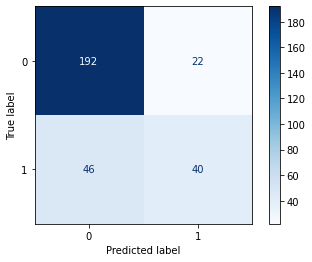

In [137]:
ConfusionMatrixDisplay(matriz_confusao).plot(cmap='Blues')

### Da matriz de confusão, temos

* 192 + 40 : Acertos

* 46 + 22 : Erros

### Classification report: Organiza e compila resultados derivados da matriz de confusão

In [138]:
from sklearn.metrics import classification_report

print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       214
           1       0.65      0.47      0.54        86

    accuracy                           0.77       300
   macro avg       0.73      0.68      0.70       300
weighted avg       0.76      0.77      0.76       300



### Acurácia do modelo: 0.77

### Precisão: Proporção de predições corretas de uma categoria em relação a todas as predições dessa categoria

<img src = 'assets/precisao.png'>

### Recall: Proporção de predições corretas da categoria alvo.
### F1-Score: Média harmônica entre precisão e recall.
### Support: Quantidade absoluta de casos em cada categoria.

### Curva ROC

In [139]:
from sklearn.metrics import roc_curve, roc_auc_score

# Pares com as probabilidades de o evento ser previsto com 1 ou previsto com 0
prob_previsao = modelo.predict_proba(teste_x)[:,1]

* tfp: Taxa de falsos positivos
* tvp: taxa de verdadeiros positivos

In [140]:
# Desenha a curva
tfp, tvp, limite = roc_curve(teste_y, prob_previsao)

# Auc calcula a área sob a curva
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

roc_auc 0.7552705933492719


### Plotando a curva

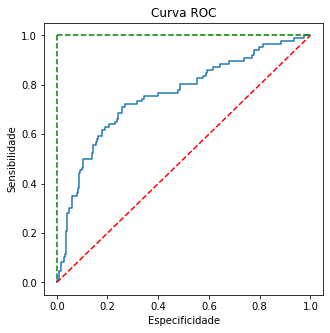

In [141]:
# Curva ROC
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')

# Plotando linhas guias
# Linha vermelha:
plt.plot([0,1], ls = '--', c = 'red')
# Linha verde:
plt.plot([0,0], [1,0], ls = '--', c = 'green'), plt.plot([1,1], ls='--', c = 'green')

plt.show()

### Etendendo a curva ROC:

#### Avalia o desempenho do modelo a partir da relação entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (especificidade) para diferentes limites.

$$Especificidade = \frac{VN}{VN + FP}$$

$$Sensibilidade = \frac{VP}{VP+ FN}$$

### No gráfico, a linha vermelha representa um modelo aleatório.
### A linha verde indica um modelo perfeito, todas as predições serão corretas.

### Assim sendo, quanto mais próxima a curva de ROC estiver das linhas verdes, melhor.

***
### AUC: Area Under the Curve

#### Quantifica a curva ROC através da área.

#### Por convenção estatística:

* $área < 0.7$ --> Baixa discriminação
* $0.7 <= área <0.8$ --> Discriminação Aceitável
* $0.8 <= área < 0.9$ --> Discriminação excelente
* $área > 0.9$ --> Discriminação Excepcional

### No nosso caso, a discriminação é aceitável.

***
### Analisando algumas variáveis

In [142]:
variaveis = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']

dados[variaveis].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,0.69,35.55,20.90,3271.26,0.30
std,0.93,11.38,12.06,2822.74,0.46
min,0.00,19.00,4.00,250.00,0.00
25%,0.00,27.00,12.00,1365.50,0.00
50%,0.00,33.00,18.00,2319.50,0.00
75%,1.00,42.00,24.00,3972.25,1.00
max,3.00,75.00,72.00,18424.00,1.00


In [143]:
# Variáveis associadas aos homens: categorias 1,3,4
# Variáveis associadas às mulheres: categorias 2,5

dados['sexo_est_civil'].value_counts()


0    548
1    310
3     92
2     50
Name: sexo_est_civil, dtype: int64

In [144]:
dados['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

### A base é desbalanceada. São negados mais casos (300) do que aceitos (700)

### Visualizando algumas informações

### Histogramas

In [145]:
import seaborn as sns

histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']

# Enumerate começa a contar do 1
lista_histogramas = list(enumerate(histogramas))

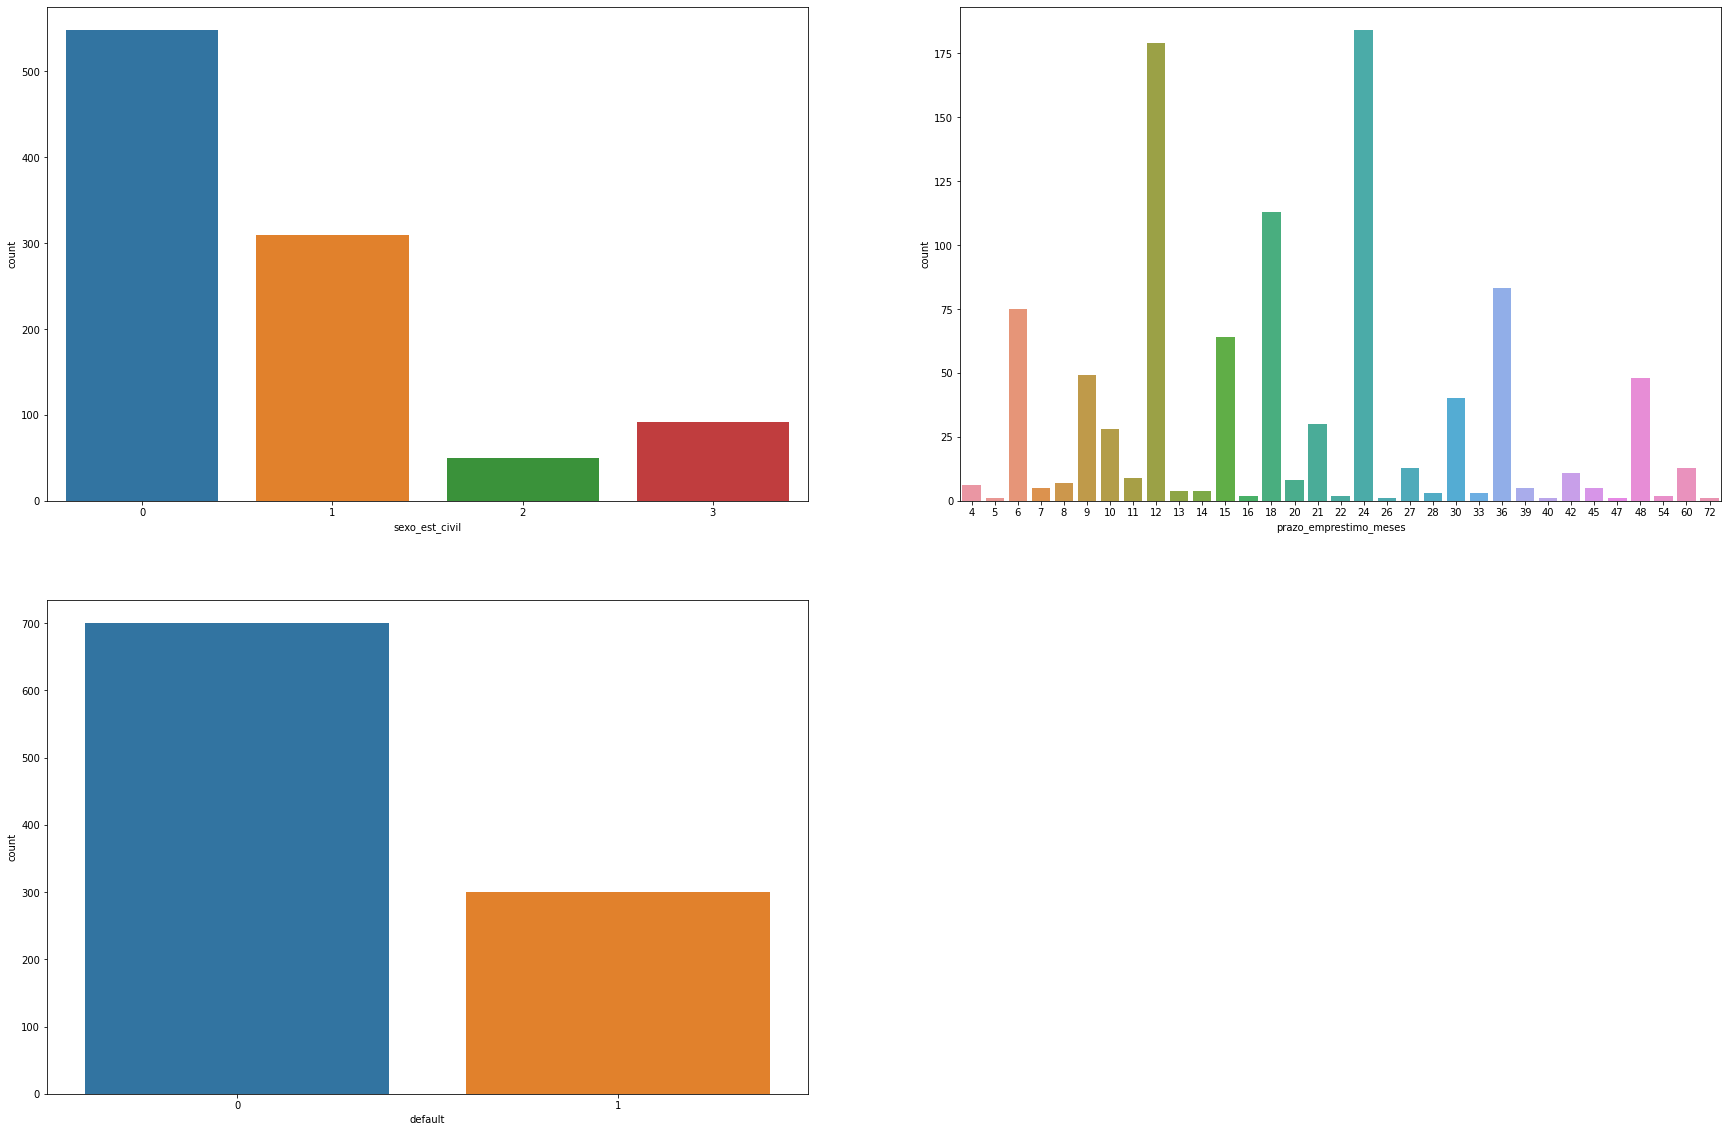

In [146]:
plt.figure(figsize=(30,20))

for i in lista_histogramas:
    
    # Formato da grade
    plt.subplot(2, 2, i[0]+1)
    sns.countplot(x = i[1], data = dados)

### Boxplots

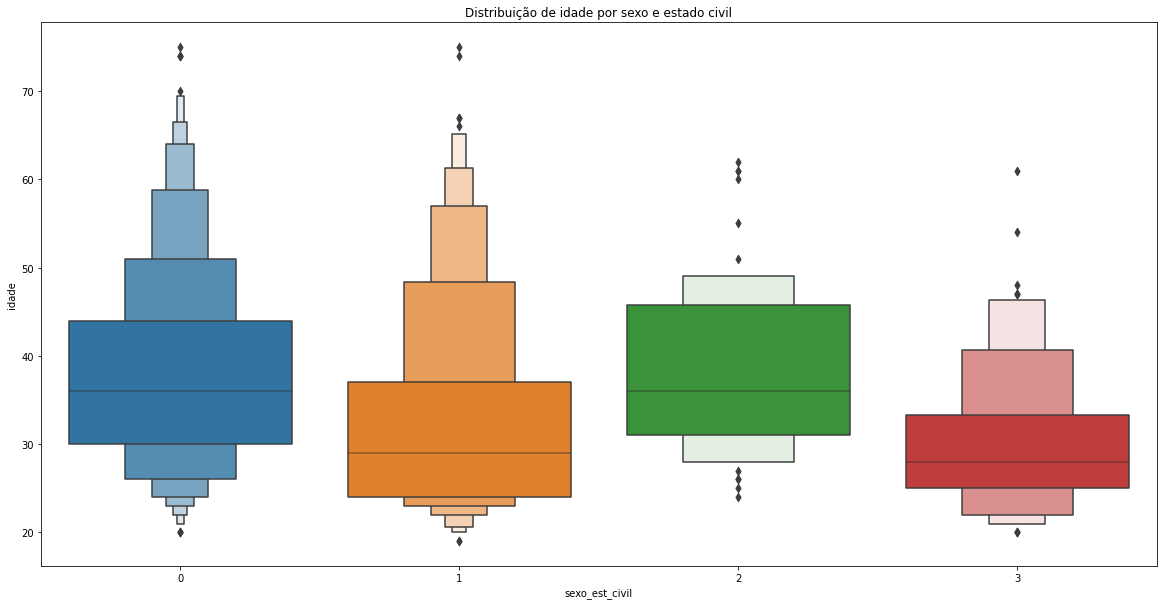

In [147]:
plt.figure(figsize = (20,10))
sns.boxenplot(x = 'sexo_est_civil', y='idade', data = dados)
plt.title('Distribuição de idade por sexo e estado civil')
plt.show()

### Barras

Text(0.5, 1.0, 'Valor x Prazo')

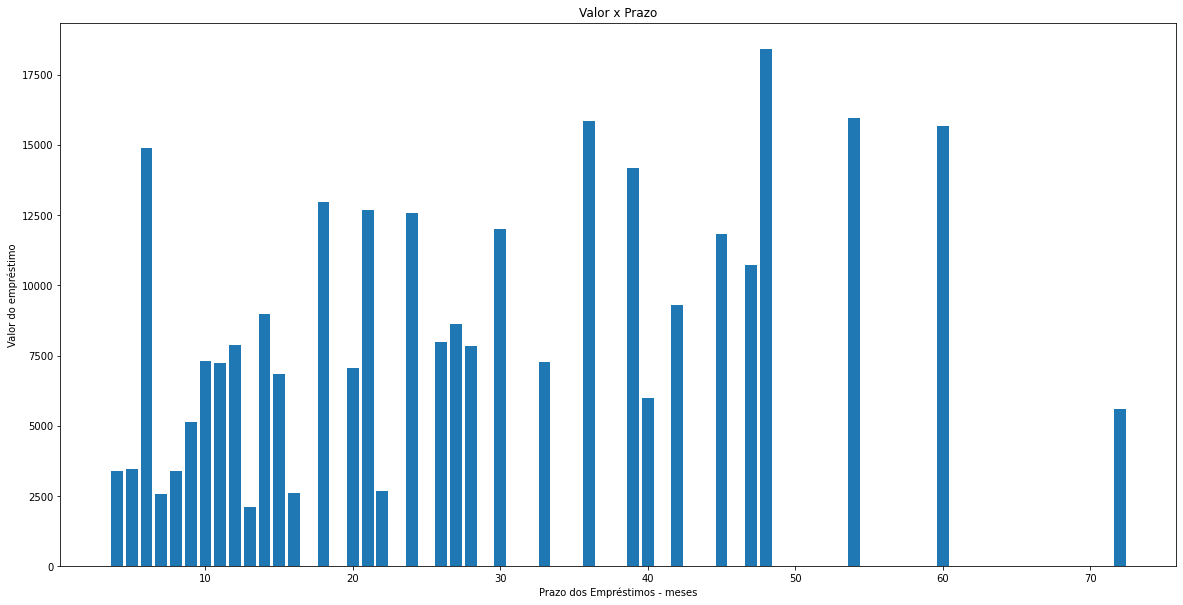

In [148]:
plt.figure(figsize=(20,10))
plt.bar(dados['prazo_emprestimo_meses'], dados['valor_emprestimo'])
plt.xlabel('Prazo dos Empréstimos - meses')
plt.ylabel('Valor do empréstimo')
plt.title('Valor x Prazo')

### Modelos de crédito no Brasil são regulados pelo Banco Central.

#### No país, os modelos não podem ser associados à informações sensíveis, tais como:

* Origem social e etnica;
* Condições de saúde;
* Informação genética;
* Orientação sexual;
* Convicções políticas, religiosas e filosóficas.

#### Assim sendo, o sexo é uma informação sensível. Estado civil não é.

### No noss caso, precisamos desvincular o sexo do estado civil.

In [149]:
#categorias da variavel 'sexo_est_civil'

#male : divorced/separated = 1
#female : divorced/separated/married = 2
#male : single = 3
#male : married/widowed = 4
#female : single = 5

#criando a variavel 'sexo'

## 1 = mulher
## 0 = homem

#criando a variavel 'estado_civil'
## 1 = solteiro(a)
## 0 = casado(a)/divorciado(a)/viúvo(a)

# dic_sexo = {1:2, 1:5, 0:1, 0:3, 0:4}
# dic_est_civil = {1:3, 1:5, 0:1, 0:2, 0:4}

# dados['sexo'] = dados['sexo_est_civil'].map(dic_sexo)
# dados['estado_civil'] = dados['sexo_est_civil'].map(dic_est_civil)

# dados.head()


### Reunindo todos os passos em uma função

In [150]:
def roda_modelo(base_dados, classificador):
    
    y = base_dados['default']
    x = base_dados.drop(columns = ['default'], axis = 1)
    
    SEED = 77
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3, random_state=SEED)
    
    # Generalizar para poder rodar qualquer modelo
    modelo = classificador
    modelo.fit(treino_x, treino_y)
    
    # Validação
    previsoes = modelo.predict(teste_x)
    matriz_confusao = confusion_matrix(teste_y, previsoes)
    ConfusionMatrixDisplay(matriz_confusao).plot(cmap='Blues')
    
    # Classification report
    
    print(classification_report(teste_y, previsoes))
    
    # Curva ROC
    prob_previsao = modelo.predict_proba(teste_x)[:,1]
    # Desenha a curva
    tfp, tvp, limite = roc_curve(teste_y, prob_previsao)

    # Auc calcula a área sob a curva
    print('roc_auc', roc_auc_score(teste_y, prob_previsao))
    
    # Plotando o gráfico
    # Curva ROC
    plt.subplots(1, figsize=(5,5))
    plt.title('Curva ROC')
    plt.plot(tfp, tvp)
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')

    # Plotando linhas guias
    # Linha vermelha:
    plt.plot([0,1], ls = '--', c = 'red')
    # Linha verde:
    plt.plot([0,0], [1,0], ls = '--', c = 'green'), plt.plot([1,1], ls='--', c = 'green')

    plt.show()
    
    return modelo, matriz_confusao    

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       214
           1       0.65      0.47      0.54        86

    accuracy                           0.77       300
   macro avg       0.73      0.68      0.70       300
weighted avg       0.76      0.77      0.76       300

roc_auc 0.7552705933492719


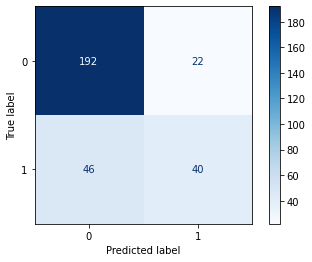

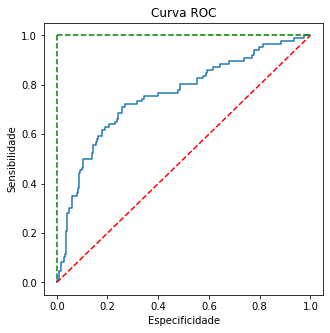

(LogisticRegression(max_iter=1000),
 array([[192,  22],
        [ 46,  40]]))

In [151]:
roda_modelo(dados, LogisticRegression(max_iter=1000))

### Faixas de Classificação

### Faixas de idade

In [152]:
#criando 'faixa_idade' para variavel 'idade'

## 18 - 30 = 1
## 31 - 40 = 2
## 41 - 50 = 3
## 51 - 60 = 4
## 61 - 70 = 5
## 71 - 80 = 6

dados['faixa_idade'] = pd.cut(x = dados['idade'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,faixa_idade
0,0,1,6,0,0,1169,0,0,4,0,0,4,0,67,0,0,2,0,1,0,0,5
1,1,2,48,1,0,5951,1,1,2,1,0,2,0,22,0,0,1,0,1,1,0,1
2,0,3,12,0,1,2096,1,2,2,0,0,3,0,49,0,0,1,1,2,1,0,3
3,0,1,42,1,2,7882,1,2,2,0,1,4,1,45,0,1,1,0,2,1,0,3
4,1,1,24,2,3,4870,1,1,3,0,0,4,2,53,0,1,2,0,2,1,0,4


### Faixas de prazo para empréstimo

In [153]:
## 1 - 12 = 1
## 13 - 24 = 2
## 25 - 36 = 3
## 37 - 48 = 4
## 49 - 60 = 5
## 61 - 72 = 6

dados['faixa_prazo'] = pd.cut(x = dados['prazo_emprestimo_meses'], bins=[1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,faixa_idade,faixa_prazo
0,0,1,6,0,0,1169,0,0,4,0,0,4,0,67,0,0,2,0,1,0,0,5,1
1,1,2,48,1,0,5951,1,1,2,1,0,2,0,22,0,0,1,0,1,1,0,1,4
2,0,3,12,0,1,2096,1,2,2,0,0,3,0,49,0,0,1,1,2,1,0,3,1
3,0,1,42,1,2,7882,1,2,2,0,1,4,1,45,0,1,1,0,2,1,0,3,4
4,1,1,24,2,3,4870,1,1,3,0,0,4,2,53,0,1,2,0,2,1,0,4,2


#### Seria bom também criar faixas para os valores dos empréstimos

### Retirando os valores absolutos, ficando apenas com as faixas

In [154]:
dados = dados.drop(['idade', 'prazo_emprestimo_meses'], axis = 1)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       214
           1       0.64      0.43      0.51        86

    accuracy                           0.77       300
   macro avg       0.72      0.67      0.68       300
weighted avg       0.75      0.77      0.75       300

roc_auc 0.7561943055857422


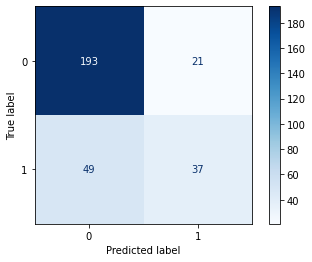

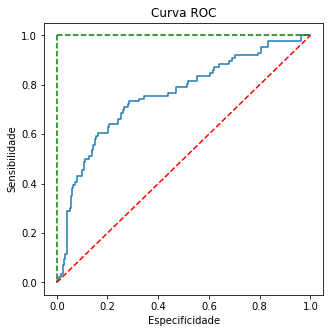

(LogisticRegression(max_iter=1000),
 array([[193,  21],
        [ 49,  37]]))

In [155]:
roda_modelo(dados, LogisticRegression(max_iter=1000))

### Treinar o último modelo com a base inteira

In [156]:
modelo = LogisticRegression(max_iter=1000)

y = dados['default']
x = dados.drop(['default'], axis = 1)

modelo.fit(x,y)

LogisticRegression(max_iter=1000)

### Exemplo de utilização

In [157]:
import numpy as np

X = np.array([[1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,1,5,1,2]])
modelo.predict(X)

/home/silsantos/anaconda3/envs/coamo/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])